# Searchsorted

In [1]:
import numpy as np
X = np.array([1, 3, 6, 8, 10])
insertion_values = np.array([2, 5, 9, 10, 11])
insertion_indices = np.searchsorted(X, insertion_values)
# array([1, 2, 4, 4, 5])
# Insert the values based on the search sorted indices
y = np.insert(X, insertion_indices, insertion_values)
y

array([ 1,  2,  3,  5,  6,  8,  9, 10, 10, 11])

# Cas Study: Top-k Using `argsort` and `argpartition`

In [15]:
import tensorflow as tf
X = tf.constant([1, 3, 2, 5, 9, 8, 4])
top_values, top_indices = tf.math.top_k(X, k=3)
top_values, top_indices

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([9, 8, 5], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 3], dtype=int32)>)

In [16]:
import torch
X = torch.tensor([1, 3, 2, 5, 9, 8, 4])
top_values, top_indices = torch.topk(X, k=3)
top_values, top_indices

(tensor([9, 8, 5]), tensor([4, 5, 3]))

In [17]:
import numpy as np

def top_k_argsort(X, k=3):
    """Get top-k values and indices along the last dimension."""
    top_indices = np.argsort(X)[..., -k:][..., ::-1]
    top_values = np.take_along_axis(X, top_indices, axis=-1)
    return top_values, top_indices

X = np.array([1, 3, 2, 5, 9, 8, 4])
top_values, top_indices = top_k_argsort(X)
top_values, top_indices

(array([9, 8, 5]), array([4, 5, 3]))

In [18]:
import numpy as np

def top_k_argpartition(X, k=3):
    """Get top-k values and indices along the last dimension."""
    # Unsorted top k values and indices
    top_indices = np.argpartition(X, -k, axis=-1)[..., -k:]
    top_values = np.take_along_axis(X, top_indices, axis=-1)

    # Sort based on top_values 
    indices = np.argsort(top_values, axis=-1)[..., ::-1]
    top_indices = np.take_along_axis(top_indices, indices, axis=-1)
    top_values = np.take_along_axis(top_values, indices, axis=-1)
    return top_values, top_indices

X = np.array([1, 3, 2, 5, 9, 8, 4])
top_values, top_indices = top_k_argpartition(X)
top_values, top_indices

(array([9, 8, 5]), array([4, 5, 3]))

Compare performance of the two NumPy top-k functions

Text(0, 0.5, 'Time Taken (sec)')

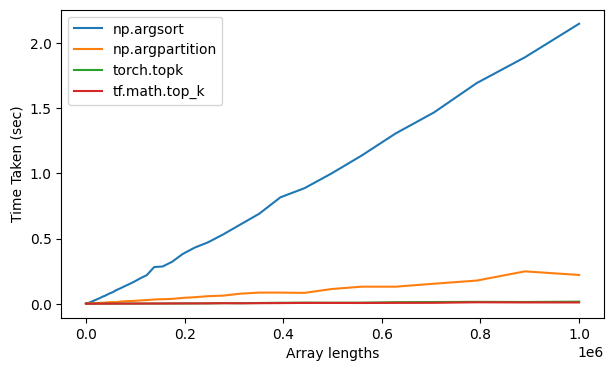

In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt

batch_size = 32
max_array_length = int(1E6)
lengths = np.concatenate([
    np.geomspace(10, max_array_length, num=100).astype(int)
])

time_taken = {
    "top_k_argsort": [], 
    "top_k_argpartition": [], 
    "torch_top_k":[], 
    "tf_top_k":[],
}
for ii, l in enumerate(lengths):
    X = np.random.randint(0, max_array_length+1, size=(batch_size, l))
    # measure top_k_argsort
    tnow = time.time()
    _ = top_k_argsort(X, k=5)
    time_taken["top_k_argsort"].append(time.time() - tnow)
    # measure top_k_argpartition
    tnow = time.time()
    _ = top_k_argpartition(X, k=5)
    time_taken["top_k_argpartition"].append(time.time() - tnow)
    # measure torch
    X_torch = torch.tensor(X)
    tnow = time.time()
    _ = torch.topk(X_torch, k=5)
    time_taken["torch_top_k"].append(time.time() - tnow)
    # measure tf
    tnow = time.time()
    _ = tf.math.top_k(X, k=5)
    time_taken["tf_top_k"].append(time.time() - tnow)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(lengths, time_taken["top_k_argsort"], label="np.argsort")
ax.plot(lengths, time_taken["top_k_argpartition"], label="np.argpartition")
ax.plot(lengths, time_taken["torch_top_k"], label="torch.topk")
ax.plot(lengths, time_taken["tf_top_k"], label="tf.math.top_k")
ax.legend()
ax.set_xlabel("Array lengths")
ax.set_ylabel("Time Taken (sec)")

# Case Study: Sort the Rows of a Matrix

In [22]:
import numpy as np

def sort_rows_lex(A, col=None):
    """Return sorted A, and index, such that A_old[index] = A_new"""
    if col is None:
        col = np.s_[::-1] # build a whole slice
    else:
        col = col[::-1]
    # Sort by columns. 
    # lexsort sort by last columns first, and first columns last
    index = np.lexsort(A[:, col].T)
    # Apply the resulting sorting
    A_sorted = A[index, :]
    
    return A_sorted, index

In [24]:
A = np.array([
    [3, 2, 1],
    [3, 1, 2],
    [1, 3, 2],
])
sort_rows_lex(A)

(array([[1, 3, 2],
        [3, 1, 2],
        [3, 2, 1]]),
 array([2, 1, 0]))

In [26]:
import numpy as np

def sort_rows_unique(A, col=None):
    """Return sorted A, and index, such that A_old[index] = A_new"""
    if col is None:
        col = np.s_[:] # build a whole slice
    # Sort each row
    _, index = np.unique(A[:, col], axis=0, return_inverse=True)
    # Apply the resulting sorting
    A_sorted = A[np.argsort(index), :]
    
    return A_sorted, index

In [27]:
sort_rows_unique(A)

(array([[1, 3, 2],
        [3, 1, 2],
        [3, 2, 1]]),
 array([2, 1, 0]))

In [29]:
# Sorting more rows
A = np.array([
    [3, 2, 1],
    [1, 3, 2],
    [2, 1, 3],
    [1, 2, 3],
    [3, 1, 2],
    [2, 3, 1],
])

A_sorted_lex, _ = sort_rows_lex(A)
A_sorted_unique, _ = sort_rows_unique(A)
assert np.allclose(A_sorted_lex, A_sorted_unique)
A_sorted_unique

array([[1, 2, 3],
       [1, 3, 2],
       [2, 1, 3],
       [2, 3, 1],
       [3, 1, 2],
       [3, 2, 1]])

In [31]:
# Sorting strings
B = np.array([
    ["a", "c", "b"],
    ["b", "a", "c"],
    ["c", "b", "a"]
])
B_sorted_lex, _ = sort_rows_lex(B)
B_sorted_unique, _ = sort_rows_unique(B)
assert np.all(B_sorted_lex == B_sorted_unique)
B_sorted_lex

array([['a', 'c', 'b'],
       ['b', 'a', 'c'],
       ['c', 'b', 'a']], dtype='<U1')

# Case Study: Reverse Padded Sequence

In [46]:
import tensorflow as tf
sequence = tf.constant([
    [3, 4, 7, 8, 0, 0, 0, 0],
    [2, 3, 5, 0, 0, 0, 0, 0],
    [8, 7, 6, 5, 4, 0, 0, 0],
])
seq_lengths = tf.constant([4, 6, 5])
reversed_sequence = tf.reverse_sequence(
    sequence, seq_lengths, seq_axis=1, batch_axis=0
)
reversed_sequence

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[8, 7, 4, 3, 0, 0, 0, 0],
       [0, 0, 0, 5, 3, 2, 0, 0],
       [4, 5, 6, 7, 8, 0, 0, 0]], dtype=int32)>

In [44]:
import numpy as np

def reverse_sequence(sequence, seq_lengths, seq_axis=1, batch_axis=0):
    """
    Reverse a batch of variable-length sequences given known sequence lengths.
    Assuming the sequences are left-aligned with padding on the right.

    * sequence: input sequence tensor. Must be at least 2D.
    * seq_lengths: list of integer sequence lengths. Its values must be less
            than the size of the sequence dimension, sequence.shape[seq_axis]
    * seq_axis: axis of the sequence dimension. Default to 1.
    * batch_axis: axis of the batch dimension. Default to 0.
    """
    seq_lengths = np.asarray(seq_lengths)[:, None]
    assert sequence.shape[batch_axis] == len(
        seq_lengths
    ), "Length of seq_lengths must be equal to sequence.shape[batch_axis]"

    # creating reversing indices via masking (batch_size, seq_len)
    indices = np.arange(sequence.shape[seq_axis])
    # if within specified sequence length, create the reverse index
    # otherwise, retain the forward index
    indices = np.where(
        indices < seq_lengths, seq_lengths - 1 - indices, indices
    )

    # Add additional singleton dimensions for broadcasting
    # e.g. (1, ..., batch_size, ...., seq_size, ..., 1, ...)
    shape = [1] * sequence.ndim
    shape[batch_axis] = indices.shape[0]
    shape[seq_axis] = indices.shape[1]
    indices = indices.reshape(shape)

    # reindexing
    reversed_sequence = np.take_along_axis(sequence, indices, axis=seq_axis)

    return reversed_sequence

In [40]:
import numpy as np
import tensorflow as tf

# Create a 2D example
sequence = np.array([
    [3, 4, 7, 8, 0, 0, 0, 0],
    [2, 3, 5, 0, 0, 0, 0, 0],
    [8, 7, 6, 5, 4, 0, 0, 0],
])
batch_axis = 0
seq_axis = 1
seq_lengths = [4, 6, 5]

reversed_sequence_np = reverse_sequence(
    sequence, seq_lengths, seq_axis=seq_axis, batch_axis=batch_axis
)
reversed_sequence_tf = tf.reverse_sequence(
    sequence, seq_lengths, seq_axis=seq_axis, batch_axis=batch_axis
)

assert np.allclose(reversed_sequence_np, reversed_sequence_tf)

# Create a 3D example. The batch and sequence axes are not defaults.
# batch_axis = 1, seq_axis = 2
sequence = torch.asarray(
    np.array(
        [
            [
                [3, 4, 7, 8, 0, 0, 0, 0],
                [2, 3, 5, 0, 0, 0, 0, 0],
                [8, 7, 6, 5, 4, 0, 0, 0],
            ],
            [
                [2, 4, 6, 8, 0, 0, 0, 0],
                [4, 6, 10, 0, 0, 0, 0, 0],
                [16, 14, 12, 10, 8, 0, 0, 0],
            ],
        ]
    )
)
batch_axis = 1
seq_axis = 2
# Here padding is also not always 0 and valid sequence value is not always > 0
seq_lengths = [4, 6, 3]

reversed_sequence_np = reverse_sequence(
    sequence, seq_lengths, seq_axis=seq_axis, batch_axis=batch_axis
)
reversed_sequence_tf = tf.reverse_sequence(
    sequence, seq_lengths, seq_axis=seq_axis, batch_axis=batch_axis
)

assert np.allclose(reversed_sequence_np, reversed_sequence_tf)

# Case Study: Gumbel-Max Sampling with Weights

In [49]:
import numpy as np
import tensorflow as tf

def gumbel_max_sample_without_replacement(
    true_labels: tf.SparseTensor,
    num_neg_samples: int,
    vocab_size: int,
    vocab_freq: tf.Tensor = None,
    shuffle: bool = True,
):
    """
    Use Gumbel-Max trick to select negative samples.
    * true_labels: (batch_size, None)
        Positive / label class indices, 1-based indexing
    * num_nega_samples:
        Number of negative samples to take
    * vocab_size:
        Number of items in the categorical variable
    * vocab_freq:
        The distribution of the classes to take samples from.
        Does not have to be normalized.
        If None, assuming uniform sampling.
    * shuffle:
        Whether or not to shuffle the results so that the
        positive labels are not always at the beginning of
        the resulting sample.
    """
    # Default to uniform sampling if vocab_freq is None
    if vocab_freq is None:
        vocab_freq = tf.ones((vocab_size, ), tf.float32)
        
    # Compute proba for the batch
    true_proba = tf.sparse.to_indicator(
        true_labels, vocab_size + 1
    )
    true_proba = true_proba[:, 1:]  # get rid of OOV bucket
    true_proba = tf.cast(true_proba, tf.float32)
    neg_proba = (1.0 - true_proba) * vocab_freq
    
    # Gumbel-Max trick: perturbed logits
    z = -tf.math.log(
        -tf.math.log(
            tf.random.uniform(tf.shape(neg_proba), 0, 1)
        )
    )
    z += tf.math.log(neg_proba + 1e-8)
    # set true targets as -inf, so it won't be sampled
    z = tf.where(
        tf.greater(true_proba, 0.5), -np.inf, z
    )
    
    # Take negative samples
    _, neg_samples = tf.math.top_k(
        z, num_neg_samples, sorted=False
    )  # (batch_size, num_neg_samples)
    # offset by 1, since we use 1-based indexing
    neg_samples = tf.cast(neg_samples, tf.int64) + 1
    # Concat to make the full sample: positive + negative
    samples = tf.concat([
        tf.sparse.to_dense(true_labels),
        -neg_samples
    ], axis=1)
    
    # shuffle
    if shuffle:
        # generating random ordered indices
        r = tf.random.uniform(tf.shape(samples))
        r = tf.argsort(r, axis=1)
        # Apply the shuffled indices
        samples = tf.gather(samples, r, axis=1, batch_dims=1)    
    
    # Convert to sparse
    samples = tf.sparse.from_dense(samples)
    
    # Left align
    row_indices = samples.indices[:, 0]
    row_counts = tf.unique_with_counts(
        row_indices, out_idx=tf.int64
    ).count
    column_indices = tf.ragged.range(row_counts).flat_values
    indices = tf.transpose(tf.stack([row_indices, column_indices]))
    binary_labels = tf.SparseTensor(
        indices=indices,
        values=tf.where(samples.values > 0, 1.0, 0.0),
        dense_shape=samples.dense_shape,
    )
    samples = tf.SparseTensor(
        indices=indices,
        values=tf.abs(samples.values),
        dense_shape=samples.dense_shape,
    )
    
    return samples, binary_labels

In [50]:
from collections import Counter
import numpy as np

def simulate_gumbel_max(
    batch_size=1024,
    max_num_pos_samples=5,
    num_neg_samples=10,
    vocab_size=100,
    num_iter=100,
    vocab_freq=None,
):
    """Get sampling frequency of each negative class."""
    # Initialize the counter
    neg_sample_freq = Counter()
    for _ in range(num_iter):
        true_labels = []
        # Generate positive samples iteratively
        for num_pos in np.random.choice(
                np.arange(1, max_num_pos_samples+1),
                size=batch_size,
                replace=True
            ):
            pos_samples = np.random.choice(
                np.arange(1, vocab_size+1),
                size=num_pos,
                replace=False,
            )
            true_labels.append(pos_samples)

        # Convert to left aligned sparse
        true_labels = tf.ragged.constant(
            true_labels, dtype=tf.int64
        ).to_sparse()

        # Use Gumbel-Max negative sampling
        samples, binary_labels = gumbel_max_sample_without_replacement(
            true_labels,
            num_neg_samples=num_neg_samples,
            vocab_size=vocab_size,
            vocab_freq=vocab_freq,
            shuffle=False,
        )

        # Extract negative labels only
        neg_samples = samples.values.numpy() * (
            1 - binary_labels.values.numpy()
        )
        neg_samples = neg_samples[neg_samples > 0]
        neg_samples = neg_samples.astype(int).tolist()
        neg_sample_freq.update(neg_samples)

    return neg_sample_freq

Text(0, 0.5, 'Frequency')

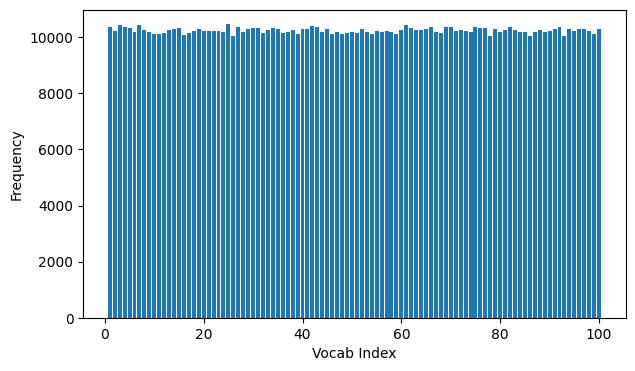

In [51]:
# Uniform
import matplotlib.pyplot as plt
# Simulate: default from uniform distribution
neg_sample_freq = simulate_gumbel_max()
# Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.bar(list(neg_sample_freq.keys()), list(neg_sample_freq.values()))
ax.set_xlabel("Vocab Index")
ax.set_ylabel("Frequency")

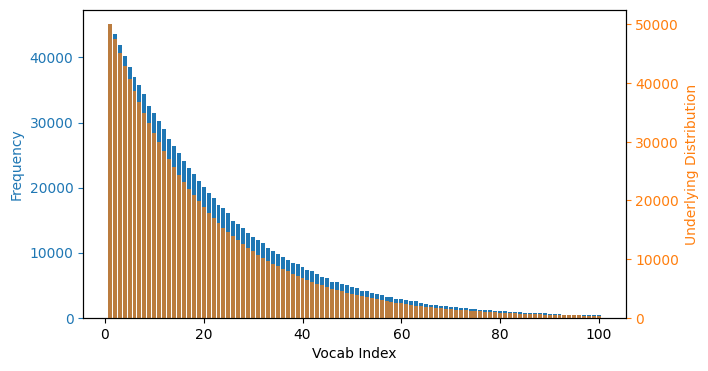

In [53]:
# Geometric
rho = 0.05
vocab_freq = (1 - rho)**(np.arange(100)) * rho * 1E6
neg_sample_freq = simulate_gumbel_max(
    vocab_freq=vocab_freq
)
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.bar(list(neg_sample_freq.keys()), list(neg_sample_freq.values()), alpha=1.0)
ax_twin = ax.twinx() 
ax_twin.bar(np.arange(1, 100+1), vocab_freq, color="#FF7F0E", alpha=0.7)
ax.set_xlabel("Vocab Index")
ax.set_ylabel("Frequency", color="#1F77B4")
ax_twin.set_ylabel("Underlying Distribution", color="#FF7F0E")
ax.tick_params(axis='y', colors="#1F77B4")
ax_twin.tick_params(axis='y', colors="#FF7F0E")

# Case Study: Sorting Articles Around Anchored Advertisements

In [54]:
import tensorflow as tf

def arrange_ads_among_news(
    news_scores,
    ads_scores,
    ads_positions,
    news_vocab=None,
    ads_vocab=None,
    k=8
):
    """
    Arrange ads within a series of news articles for a batch of users.
    
    Inputs:
        * news_scores: (batch_size, news_vocab_size) Tensor
            Scores for each news, corresponding to each news in news_vocab
        * ads_scores: (batch_size, ads_vocab_size) Tensor
            Scores for each ad, corresponding to each ad in ads_vocab
        * ads_positions: (batch_size, None) Left Aligned SparseTensor
            List of allowed ads positions for each user
        * news_vocab: (news_vocab_size, ) array
            List of vocabulary for news. If None, the function returns
            the indices in the concatenated vocab space [news, ..., ads, ...]
        * ads_vocab: (ads_vocab_size, ) array
            List of vocabulary for ads. If None, the function returns
            the indices in the concatenated vocab space [news, ..., ads, ...]
        * k: int
            Number of total contents to keep.
    """
    # Sort the news and ads
    # switch to 1-based indexing
    news_items = tf.argsort(news_scores, direction="DESCENDING") + 1
    # padding at the beginning of each row
    news_items = tf.pad(news_items, [(0, 0), (1, 0)])
    news_items = tf.cast(news_items, tf.int64)
    ads_items = tf.argsort(ads_scores, direction="DESCENDING") + 1
    ads_items = tf.pad(ads_items, [(0, 0), (1, 0)])
    ads_items = tf.cast(ads_items, tf.int64)
    
    # Compute unanchored positions mask
    anchored_indices = tf.transpose(
        tf.stack([ads_positions.indices[:, 0], ads_positions.values])
    )
    # remove any anchor positions beyond the max number of contents to keep
    anchored_indices = tf.boolean_mask(
        anchored_indices, anchored_indices[:, 1] < k, axis=0
    )
    # Use sparse tensor to inidcate the anchored positions
    anchored_mask = tf.sparse.SparseTensor(
        indices = anchored_indices, 
        values = tf.ones_like(anchored_indices[:, 0]),
        dense_shape=(tf.shape(news_scores)[0], k)
    )
    anchored_mask = tf.sparse.to_dense(anchored_mask)
    
    # Create the indices matrix for ads
    anchored_positions = tf.cumsum(anchored_mask, axis=1) * anchored_mask
    # Gather along axis=1
    output_index_ads = tf.gather(
        ads_items, anchored_positions, batch_dims=1, axis=1
    )
    
    # Create the indices matrix for news
    free_mask = 1 - anchored_mask
    free_positions = tf.cumsum(free_mask, axis=1) * free_mask
    output_index_news = tf.gather(
        news_items, free_positions, batch_dims=1, axis=1
    )
    
    # Combine the two sets of indices together
    news_vocab_size = tf.cast(tf.shape(news_scores)[1], tf.int64)
    output_index = tf.where(
        free_mask > 0,
        # convert back to 1 based indexing
        output_index_news-1,
        # index of ads in the combined vocab
        news_vocab_size + output_index_ads - 1
    )
    
    if news_vocab is not None and ads_vocab is not None:
        # Create the string outputs
        vocab = tf.concat([news_vocab, ads_vocab], axis=0)
        output = tf.gather(vocab, output_index)
        return output, free_mask
    else:
        # return the indices in the combined space
        return output_index, free_mask

In [55]:
news_scores = tf.constant([
    [0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    [0.1, 0.4, 0.2, 0.7, 0.6, 0.5, 0.3],
])
ads_scores = tf.constant([
    [0.5, 0.3, 0.1],
    [0.1, 0.4, 0.8],
    [0.2, 0.6, 0.4],
])
ads_positions = tf.ragged.constant([
    [2, 4], [3, 7], [0, 3, 6, 9]    
], dtype=tf.int64).to_sparse()
k = 8 # max number of contents to keep

news_vocab = tf.constant(["a", "b", "c", "d", "e", "f", "g"])
ads_vocab = tf.constant(["x", "y", "z"])

output, mask = arrange_ads_among_news(
    news_scores,
    ads_scores,
    ads_positions,
    news_vocab=news_vocab,
    ads_vocab=ads_vocab,
    k=k,
)

In [58]:
output

<tf.Tensor: shape=(3, 8), dtype=string, numpy=
array([[b'a', b'b', b'x', b'c', b'y', b'd', b'e', b'f'],
       [b'g', b'f', b'e', b'z', b'd', b'c', b'b', b'y'],
       [b'y', b'd', b'e', b'z', b'f', b'b', b'x', b'g']], dtype=object)>

In [59]:
mask

<tf.Tensor: shape=(3, 8), dtype=int64, numpy=
array([[1, 1, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 1]])>